In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Load the data

In [3]:
data = pd.read_csv(r'C:\Users\Yash Kumar\Documents\customer_churn - Copy.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Drop customer ID

In [4]:
data.drop('customerID', axis = 'columns', inplace = True)

In [7]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

### Here we see that the values are number but it shows datatype object, i think data have some string values lets find out

In [9]:
pd.to_numeric(data.TotalCharges)

ValueError: Unable to parse string " " at position 488

### OK so some values seen blank string lets find out

In [10]:
pd.to_numeric(data.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
data[pd.to_numeric(data.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
data.shape

(7043, 20)

In [13]:
data.iloc[488].TotalCharges

' '

In [17]:
data[data.TotalCharges!=' '].shape

(7032, 20)

### Remove rows with space in TotalChanges

In [21]:
data_1 = data[data.TotalCharges!=' ']

In [22]:
data_1.shape

(7032, 20)

In [23]:
data_1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
data_1.TotalCharges = pd.to_numeric(data_1.TotalCharges)

In [25]:
data_1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [27]:
data_1[data_1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### Data Visualization

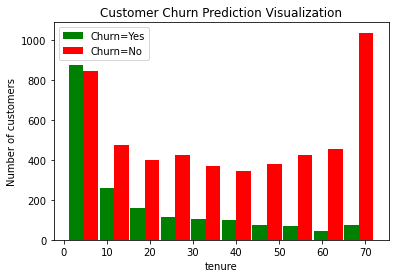

In [36]:
tenure_churn_no = data_1[data_1.Churn == 'No'].tenure
tenure_churn_yes = data_1[data_1.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')




plt.hist([tenure_churn_yes, tenure_churn_no], rwidth = 0.95, color = ['green', 'red'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()

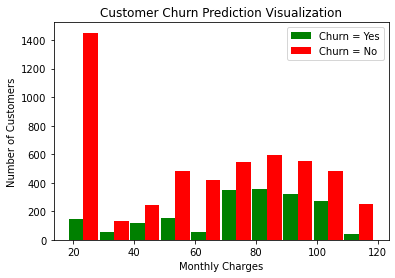

In [37]:
mc_churn_no = data_1[data_1.Churn == 'No'].MonthlyCharges
mc_churn_yes = data_1[data_1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([mc_churn_yes, mc_churn_no], rwidth = 0.95, color = ['green','red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()
plt.show()

### Now see the object values basically yes or no

In [40]:
def print_unique_col_values(data_1):
    for column in data_1:
        if data_1[column].dtypes == 'object':
            print(f'{column}: {data_1[column].unique()}')
        

In [41]:
print_unique_col_values(data_1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [43]:
data_1.replace('No internet service','No', inplace = True)
data_1.replace('No phone service', 'No', inplace = True)

In [44]:
print_unique_col_values(data_1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### Converts Yes and No with 1 and 0

In [45]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    data_1[col].replace({'Yes':1,'No':0}, inplace = True)

In [46]:
for col in data_1:
    print(f'{col}:{data_1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [47]:
data_1['gender'].replace({'Female':1,'Male':0}, inplace = True)


In [49]:
data_1.gender.unique()

array([1, 0], dtype=int64)

In [50]:
data_2 = pd.get_dummies(data = data_1, columns = ['InternetService','Contract','PaymentMethod'])
data_2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [51]:
data_2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
13,0,0,0,0,49,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0
4884,1,0,1,1,41,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
5711,1,1,1,0,20,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1371,1,1,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
58,1,0,1,1,34,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [52]:
data_2.shape

(7032, 27)

In [53]:
data.shape

(7032, 20)

In [55]:
data_2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### Scale the value

In [56]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_2[columns_to_scale] = scaler.fit_transform(data_2[columns_to_scale])

In [57]:
for column in data_2:
    print(f'{column}:{data_2[column].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [58]:
data_2.isnull().any()

gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
tenure                                     False
PhoneService                               False
MultipleLines                              False
OnlineSecurity                             False
OnlineBackup                               False
DeviceProtection                           False
TechSupport                                False
StreamingTV                                False
StreamingMovies                            False
PaperlessBilling                           False
MonthlyCharges                             False
TotalCharges                               False
Churn                                      False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
Contract_Month-to-mo

### Now data is ready now apply for model

In [61]:
x = data_2.drop('Churn', axis = 'columns')
y = data_2['Churn']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size = 0.2, random_state = 5)

In [62]:
x_train.shape

(5625, 26)

In [63]:
x_test.shape

(1407, 26)

In [64]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [65]:
y_train[:10]

5664    1
101     0
2621    0
392     0
1327    1
3607    0
2773    0
1936    0
5387    0
4331    0
Name: Churn, dtype: int64

In [66]:
len(x_train.columns)

26

### Build a Model (Artificial Neural Network)ANN.

In [93]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [95]:
from tensorflow_addons import losses

In [96]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [97]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
176/176 [==============================] - 3s 2ms/step - loss: 0.6284 - accuracy: 0.6125
Epoch 2/100
176/176 [==============================] - 0s 867us/step - loss: 0.4472 - accuracy: 0.7813
Epoch 3/100
176/176 [==============================] - 0s 783us/step - loss: 0.4149 - accuracy: 0.8032
Epoch 4/100
176/176 [==============================] - 0s 771us/step - loss: 0.4069 - accuracy: 0.8153
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8042
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8131
Epoch 7/100
176/176 [==============================] - 0s 754us/step - loss: 0.4047 - accuracy: 0.8191
Epoch 8/100
176/176 [==============================] - 0s 761us/step - loss: 0.3981 - accuracy: 0.8155
Epoch 9/100
176/176 [==============================] - 0s 820us/step - loss: 0.4082 - accuracy: 0.8056
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4

### Handeling the imbalance data

### Method1:  Undersampling

In [98]:
# Class count
count_class_0, count_class_1 = data_2.Churn.value_counts()

# Divide by class
df_class_0 = data_2[data_2['Churn'] == 0]
df_class_1 = data_2[data_2['Churn'] == 1]

In [99]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [100]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [101]:
# Number of classes in training Data
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

### Printing Classification in the last, Scroll down till the last epoch to watch the classification report

In [102]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6370 - accuracy: 0.6630
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7634
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7756: 0s - loss: 0.4742 - accuracy: 0.
Epoch 4/100
94/94 [==============================] - 0s 852us/step - loss: 0.4824 - accuracy: 0.7701
Epoch 5/100
94/94 [==============================] - 0s 870us/step - loss: 0.4781 - accuracy: 0.7736
Epoch 6/100
94/94 [==============================] - 0s 760us/step - loss: 0.4762 - accuracy: 0.7789
Epoch 7/100
94/94 [==============================] - 0s 900us/step - loss: 0.4744 - accuracy: 0.7763
Epoch 8/100
94/94 [==============================] - 0s 831us/step - loss: 0.4634 - accuracy: 0.7819
Epoch 9/100
94/94 [==============================] - 0s 989us/step - loss: 0.4801 - accuracy: 0.7694
Epoch 10/100
94/94 [==============================] - 0s 823us/

### Model2: Oversampling

In [103]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [104]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [105]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [106]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 959us/step - loss: 0.5789 - accuracy: 0.7117
Epoch 2/100
259/259 [==============================] - 0s 774us/step - loss: 0.4958 - accuracy: 0.7665
Epoch 3/100
259/259 [==============================] - 0s 774us/step - loss: 0.4890 - accuracy: 0.7589
Epoch 4/100
259/259 [==============================] - 0s 761us/step - loss: 0.4743 - accuracy: 0.7747
Epoch 5/100
259/259 [==============================] - 0s 758us/step - loss: 0.4836 - accuracy: 0.7716
Epoch 6/100
259/259 [==============================] - 0s 794us/step - loss: 0.4731 - accuracy: 0.7757
Epoch 7/100
259/259 [==============================] - 0s 851us/step - loss: 0.4629 - accuracy: 0.7828
Epoch 8/100
259/259 [==============================] - 0s 850us/step - loss: 0.4786 - accuracy: 0.7707
Epoch 9/100
259/259 [==============================] - 0s 767us/step - loss: 0.4791 - accuracy: 0.7684
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - los

### Method3: SMOTE

In [108]:
X = data_2.drop('Churn',axis='columns')
y = data_2['Churn']

In [109]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [111]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [112]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5662 - accuracy: 0.7223
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4685 - accuracy: 0.7774
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4510 - accuracy: 0.7893
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4473 - accuracy: 0.7894
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4359 - accuracy: 0.7914
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4428 - accuracy: 0.7937
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4354 - accuracy: 0.7999
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4344 - accuracy: 0.7968
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4206 - accuracy: 0.8083
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4245 - accura

### Method4: Use of Ensemble with undersampling

In [114]:
data_2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [116]:
# Regain Original features and labels
X = data_2.drop('Churn',axis='columns')
y = data_2['Churn']

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [118]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [119]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [120]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [121]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [122]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [123]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6789 - accuracy: 0.5495
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.7613
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7672
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.7724
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4868 - accuracy: 0.7708
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.7766
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7759
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7713
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7766
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4512 - accuracy: 0.7946
Epoch 11/

In [124]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6498 - accuracy: 0.6495
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7574
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.7571
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4902 - accuracy: 0.7587
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.7692
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4819 - accuracy: 0.7717
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7675
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7713
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7668
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.7647
Epoch 11/

In [125]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6361 - accuracy: 0.6735
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4894 - accuracy: 0.7852
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.7703
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4868 - accuracy: 0.7730
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7775
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7780
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.7825
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.7875
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.7956
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7807
Epoch 11/

In [126]:
len(y_pred1)

1407

In [127]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [128]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.72      1407

